# This file is to have a general idea and test the fuction. The training stage is in file 2 #

In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append(r"C:\Users\yangshanqi\Documents\lab\labgithubcopy\task_1_version_2")

In [3]:
from kNN_function_with_kFold import kNN_k_parameter_adjust
from kNN_function_with_kFold import kNN_data_ratio_adjust
#from kNN_function import kNN_data_ratio_adjust_2
from kNN_function_with_kFold import kNN_k_parameter_adjust_with_specific_data_ratio 
from plot_prediction import kNN_plot_prediction

In [4]:
X_scaled_FCNN=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_scaled_FCNN.csv")
y_scaled_FCNN=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_scaled_FCNN.csv")
X_scaled_CNN=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_scaled_CNN.csv")
y_scaled_CNN=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_scaled_CNN.csv")
X_scaled_kMeans=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_scaled_kMeans.csv")
y_scaled_kMeans=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_scaled_kMeans.csv")
X_val=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_validation_feature.csv")
y_val=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\validation_label.csv")
X_scaled_kMeans=X_scaled_kMeans.drop("predict_cluster",1)
y_scaled_kMeans=y_scaled_kMeans.drop("predict_cluster",1)
X_val=X_val.drop("Unnamed: 0",1)
y_val=y_val.drop("Unnamed: 0",1)
X_scaled=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_train_feature.csv")
y_scaled=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\train_label.csv")

In [6]:
X_scaled_outlier_detection = pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\X_train_after_detection.csv")
y_scaled_outlier_detection = pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\y_train_after_detection.csv")
X_scaled_outlier_detection = X_scaled_outlier_detection.drop("Unnamed: 0",1)
y_scaled_outlier_detection =y_scaled_outlier_detection.drop("Unnamed: 0",1)
y_scaled_outlier_detection =y_scaled_outlier_detection.drop("Unnamed: 0.1",1)
y_scaled_outlier_detection =y_scaled_outlier_detection.drop("robust_dis",1)

In [8]:
y_scaled_CNN

,index_of_pixel,label,source_of_pixel
0,[59 41 60],1.0,1
1,[37 39 29],1.0,2
2,[41 39 54],1.0,3
3,[45 47 28],1.0,9
4,[44 32 45],1.0,9
5,[23 40 29],2.0,4
6,[30 46 34],1.0,7
7,[31 43 43],1.0,9
8,[38 27 26],1.0,4
9,[57 19 33],1.0,2


In [13]:
kNN_scaled_CNN_result_k_value_specific_1_ratio =kNN_k_parameter_adjust_with_specific_data_ratio (X_scaled_CNN,y_scaled_CNN,1)
kNN_scaled_CNN_result_k_value_specific_11_ratio =kNN_k_parameter_adjust_with_specific_data_ratio (X_scaled_CNN,y_scaled_CNN,1.1)
kNN_scaled_CNN_result_k_value_specific_12_ratio =kNN_k_parameter_adjust_with_specific_data_ratio (X_scaled_CNN,y_scaled_CNN,1.2)

the total executing time:  2.9minute
the total executing time:  3.0minute
the total executing time:  3.1minute


In [6]:
kNN_scaled_CNN_result_k_value_specific_ratio

,k_value,f1_score,TPR,FPR,BER,time
0,5,0.840547,0.84980,0.17220,0.161200,0.176098
1,7,0.844203,0.85555,0.17130,0.157875,0.189433
2,9,0.846454,0.85740,0.16845,0.155525,0.205680
3,11,0.848138,0.86145,0.16995,0.154250,0.207095
4,13,0.848557,0.86175,0.16935,0.153800,0.218040
5,15,0.848574,0.86320,0.17130,0.154050,0.227405
6,17,0.849142,0.86400,0.17100,0.153500,0.233013
7,19,0.848487,0.86535,0.17435,0.154500,0.239324
8,21,0.848815,0.86675,0.17550,0.154375,0.257961
9,23,0.849091,0.86645,0.17445,0.154000,0.264028


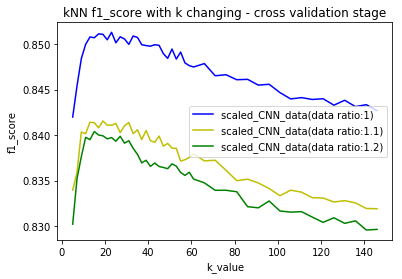

In [17]:
plt.title("kNN f1_score with k changing - cross validation stage")
plt.plot(kNN_scaled_CNN_result_k_value_specific_1_ratio['k_value'],kNN_scaled_CNN_result_k_value_specific_1_ratio['f1_score'],"b-",label='scaled_CNN_data(data ratio:1)')
plt.plot(kNN_scaled_CNN_result_k_value_specific_11_ratio['k_value'],kNN_scaled_CNN_result_k_value_specific_11_ratio['f1_score'],"y-",label='scaled_CNN_data(data ratio:1.1)')
plt.plot(kNN_scaled_CNN_result_k_value_specific_12_ratio['k_value'],kNN_scaled_CNN_result_k_value_specific_12_ratio['f1_score'],"g-",label='scaled_CNN_data(data ratio:1.2)')
plt.xlabel('k_value')
plt.ylabel('f1_score')
plt.legend()
plt.show()

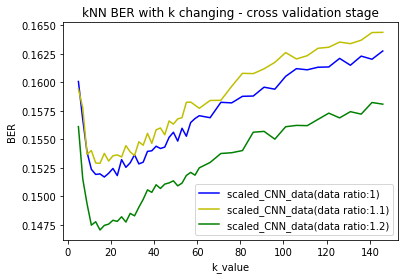

In [16]:
plt.title("kNN BER with k changing - cross validation stage")
plt.plot(kNN_scaled_CNN_result_k_value_specific_1_ratio['k_value'],kNN_scaled_CNN_result_k_value_specific_1_ratio['BER'],"b-",label='scaled_CNN_data(data ratio:1)')
plt.plot(kNN_scaled_CNN_result_k_value_specific_11_ratio['k_value'],kNN_scaled_CNN_result_k_value_specific_11_ratio['BER'],"y-",label='scaled_CNN_data(data ratio:1.1)')
plt.plot(kNN_scaled_CNN_result_k_value_specific_12_ratio['k_value'],kNN_scaled_CNN_result_k_value_specific_12_ratio['BER'],"g-",label='scaled_CNN_data(data ratio:1.2)')
plt.xlabel('k_value')
plt.ylabel('BER')
plt.legend()
plt.show()

In [29]:
kNN_scaled_result_k_value = kNN_k_parameter_adjust(X_scaled,y_scaled)

the total executing time:1021.7minute


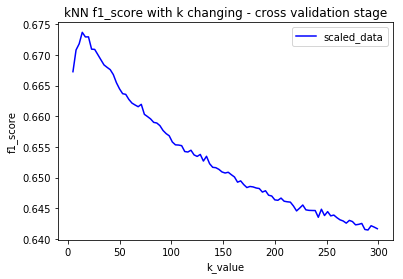

In [30]:
plt.title("kNN f1_score with k changing - cross validation stage")
plt.plot(kNN_scaled_result_k_value['k_value'],kNN_scaled_result_k_value['f1_score'],"b-",label='scaled_data')
plt.xlabel('k_value')
plt.ylabel('f1_score')
plt.legend()
plt.show()

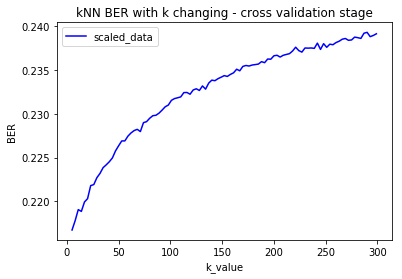

In [31]:
plt.title("kNN BER with k changing - cross validation stage")
plt.plot(kNN_scaled_result_k_value['k_value'],kNN_scaled_result_k_value['BER'],"b-",label='scaled_data')
plt.xlabel('k_value')
plt.ylabel('BER')
plt.legend()
plt.show()

In [33]:
kNN_scaled_result_k_value

,k_value,f1_score,TPR,FPR,BER,time
0,5,0.667258,0.602849,0.036322,0.216737,2.395371
1,8,0.670796,0.596928,0.032534,0.217803,2.703042
2,11,0.671796,0.592311,0.030443,0.219066,2.875435
3,14,0.673670,0.591584,0.029310,0.218863,3.241318
4,17,0.672921,0.588810,0.028680,0.219935,3.650420
5,20,0.672933,0.587637,0.028276,0.220319,3.974257
6,23,0.670928,0.584454,0.028070,0.221808,3.973136
7,26,0.670890,0.584137,0.027987,0.221925,4.064684
8,29,0.670049,0.582294,0.027722,0.222714,4.291463
9,32,0.669201,0.581381,0.027785,0.223202,4.429871


In [32]:
kNN_scaled_result_k_value.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result_kFold\\kNN_scaled_result_k_value.csv",index=True)

In [10]:
kNN_scaled_CNN_result_k_value = kNN_k_parameter_adjust(X_scaled_CNN,y_scaled_CNN)

the total executing time: 23.1minute


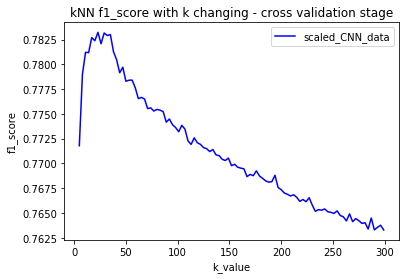

In [27]:
plt.title("kNN f1_score with k changing - cross validation stage")
plt.plot(kNN_scaled_CNN_result_k_value['k_value'],kNN_scaled_CNN_result_k_value['f1_score'],"b-",label='scaled_CNN_data')
plt.xlabel('k_value')
plt.ylabel('f1_score')
plt.legend()
plt.show()

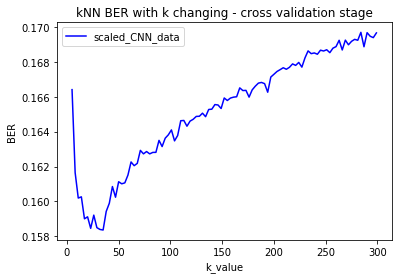

In [28]:
plt.title("kNN BER with k changing - cross validation stage")
plt.plot(kNN_scaled_CNN_result_k_value['k_value'],kNN_scaled_CNN_result_k_value['BER'],"b-",label='scaled_CNN_data')
plt.xlabel('k_value')
plt.ylabel('BER')
plt.legend()
plt.show()

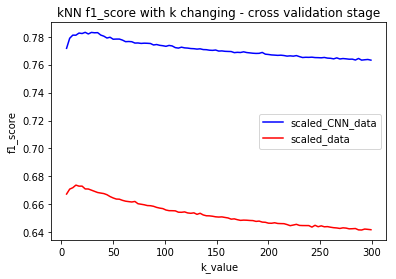

In [34]:
plt.title("kNN f1_score with k changing - cross validation stage")
plt.plot(kNN_scaled_CNN_result_k_value['k_value'],kNN_scaled_CNN_result_k_value['f1_score'],"b-",label='scaled_CNN_data')
plt.plot(kNN_scaled_result_k_value['k_value'],kNN_scaled_result_k_value['f1_score'],"r-",label='scaled_data')
plt.xlabel('k_value')
plt.ylabel('f1_score')
plt.legend()
plt.show()

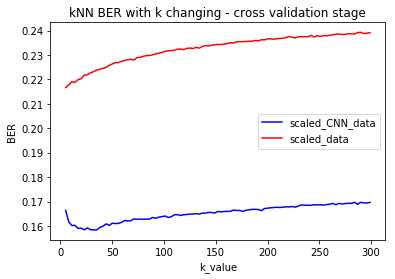

In [35]:
plt.title("kNN BER with k changing - cross validation stage")
plt.plot(kNN_scaled_CNN_result_k_value['k_value'],kNN_scaled_CNN_result_k_value['BER'],"b-",label='scaled_CNN_data')
plt.plot(kNN_scaled_result_k_value['k_value'],kNN_scaled_result_k_value['BER'],"r-",label='scaled_data')
plt.xlabel('k_value')
plt.ylabel('BER')
plt.legend()
plt.show()

In [25]:
kNN_scaled_CNN_result_k_value.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result_kFold\\kNN_scaled_CNN_result_k_value.csv",index=True)

In [10]:
kNN_scaled_FCNN_result_k_value = kNN_k_parameter_adjust(X_scaled_FCNN,y_scaled_FCNN)

the total executing time: 24.8minute


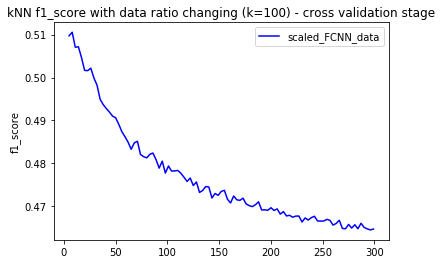

In [12]:
plt.title("kNN f1_score with data ratio changing (k=100) - cross validation stage")
plt.plot(kNN_scaled_FCNN_result_k_value['k_value'],kNN_scaled_FCNN_result_k_value['f1_score'],"b-",label='scaled_FCNN_data')
plt.ylabel('f1_score')
plt.legend()
plt.show()

In [5]:
k_value = 100
kNN_scaled_FCNN_result_data_ratio=kNN_data_ratio_adjust(X_scaled_FCNN,y_scaled_FCNN,k_value)
kNN_scaled_CNN_result_data_ratio=kNN_data_ratio_adjust(X_scaled_CNN,y_scaled_CNN,k_value)
kNN_scaled_kMeans_result_data_ratio=kNN_data_ratio_adjust(X_scaled_kMeans,y_scaled_kMeans,k_value)
kNN_scaled_result_data_ratio=kNN_data_ratio_adjust(X_scaled,y_scaled,k_value)

the total executing time:  1.7minute
the total executing time:  1.4minute
the total executing time:  4.6minute
the total executing time:  5.9minute


In [15]:
k_value = 100
kNN_scaled_outlier_detection_result_data_ratio=kNN_data_ratio_adjust(X_scaled_outlier_detection,y_scaled_outlier_detection,k_value)

the total executing time:  7.0minute


In [23]:
kNN_scaled_FCNN_result_data_ratio.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result_kFold\\kNN_scaled_FCNN_result_data_ratio.csv",index=True)
kNN_scaled_CNN_result_data_ratio.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result_kFold\\kNN_scaled_CNN_result_data_ratio.csv",index=True)
kNN_scaled_kMeans_result_data_ratio.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result_kFold\\kNN_scaled_kMeans_result_data_ratio.csv",index=True)
kNN_scaled_result_data_ratio.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result_kFold\\kNN_scaled_result_data_ratio.csv",index=True)
kNN_scaled_outlier_detection_result_data_ratio.to_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result_kFold\\kNN_scaled_outlier_detection_result_data_ratio.csv",index=True)

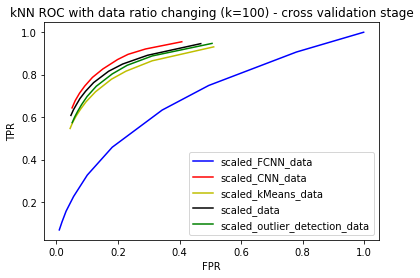

In [16]:
plt.title("kNN ROC with data ratio changing (k=100) - cross validation stage")
plt.plot(kNN_scaled_FCNN_result_data_ratio['FPR'],kNN_scaled_FCNN_result_data_ratio['TPR'],"b-",label='scaled_FCNN_data')
plt.plot(kNN_scaled_CNN_result_data_ratio['FPR'],kNN_scaled_CNN_result_data_ratio['TPR'],"r-",label='scaled_CNN_data')
plt.plot(kNN_scaled_kMeans_result_data_ratio['FPR'],kNN_scaled_kMeans_result_data_ratio['TPR'],"y-",label='scaled_kMeans_data')
plt.plot(kNN_scaled_result_data_ratio['FPR'],kNN_scaled_result_data_ratio['TPR'],"k-",label='scaled_data')
plt.plot(kNN_scaled_outlier_detection_result_data_ratio['FPR'],kNN_scaled_outlier_detection_result_data_ratio['TPR'],"g-",label='scaled_outlier_detection_data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

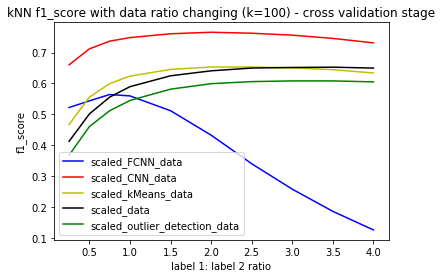

In [17]:
plt.title("kNN f1_score with data ratio changing (k=100) - cross validation stage")
plt.plot(kNN_scaled_FCNN_result_data_ratio['label 1: label 2 ratio'],kNN_scaled_FCNN_result_data_ratio['f1_score'],"b-",label='scaled_FCNN_data')
plt.plot(kNN_scaled_CNN_result_data_ratio['label 1: label 2 ratio'],kNN_scaled_CNN_result_data_ratio['f1_score'],"r-",label='scaled_CNN_data')
plt.plot(kNN_scaled_kMeans_result_data_ratio['label 1: label 2 ratio'],kNN_scaled_kMeans_result_data_ratio['f1_score'],"y-",label='scaled_kMeans_data')
plt.plot(kNN_scaled_result_data_ratio['label 1: label 2 ratio'],kNN_scaled_result_data_ratio['f1_score'],"k-",label='scaled_data')
plt.plot(kNN_scaled_outlier_detection_result_data_ratio['label 1: label 2 ratio'],kNN_scaled_outlier_detection_result_data_ratio['f1_score'],"g-",label='scaled_outlier_detection_data')
plt.xlabel('label 1: label 2 ratio')
plt.ylabel('f1_score')
plt.legend()
plt.show()

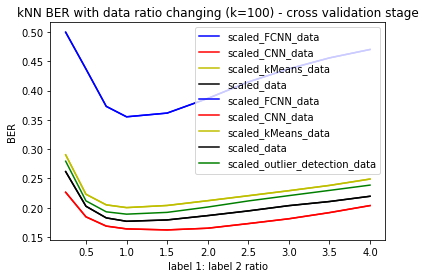

In [19]:
plt.title("kNN BER with data ratio changing (k=100) - cross validation stage")
plt.plot(kNN_scaled_FCNN_result_data_ratio['label 1: label 2 ratio'],kNN_scaled_FCNN_result_data_ratio['BER'],"b-",label='scaled_FCNN_data')
plt.plot(kNN_scaled_CNN_result_data_ratio['label 1: label 2 ratio'],kNN_scaled_CNN_result_data_ratio['BER'],"r-",label='scaled_CNN_data')
plt.plot(kNN_scaled_kMeans_result_data_ratio['label 1: label 2 ratio'],kNN_scaled_kMeans_result_data_ratio['BER'],"y-",label='scaled_kMeans_data')
plt.plot(kNN_scaled_result_data_ratio['label 1: label 2 ratio'],kNN_scaled_result_data_ratio['BER'],"k-",label='scaled_data')
plt.plot(kNN_scaled_outlier_detection_result_data_ratio['label 1: label 2 ratio'],kNN_scaled_outlier_detection_result_data_ratio['BER'],"g-",label='scaled_outlier_detection_data')
plt.xlabel('label 1: label 2 ratio')
plt.ylabel('BER')
plt.legend()
plt.show()

In [20]:
kNN_scaled_CNN_result_data_ratio

,label_1_amount,label_2_amount,label 1: label 2 ratio,f1_score,TPR,FPR,BER,time
0,40000,10000,4.00,0.731150,0.643375,0.050573,0.203599,1.052321
1,35000,10000,3.50,0.745552,0.677663,0.060846,0.191592,0.991545
2,30000,10000,3.00,0.756072,0.712866,0.075021,0.181077,0.961227
3,25000,10000,2.50,0.762295,0.746120,0.091801,0.172840,0.931450
4,20000,10000,2.00,0.765487,0.787057,0.116946,0.164945,0.865275
5,15000,10000,1.50,0.760545,0.826771,0.150871,0.162050,0.829300
6,10000,10000,1.00,0.748144,0.871111,0.198705,0.163797,0.793383
7,7500,10000,0.75,0.736693,0.895459,0.232598,0.168569,0.775815
8,5000,10000,0.50,0.711728,0.920687,0.289444,0.184379,0.703430
9,2500,10000,0.25,0.660118,0.954705,0.407286,0.226290,0.660489
